**DATA ANALYSIS ON A BICYCLE DATASET**

IMPORT ALL THE REQUIRED MODULES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

IMPORT THE DATASET

In [2]:
bicycle = pd.read_csv('//Users/da_learners_m1_18/Downloads/das223 2/Regression/day.csv')

SHOWING THE STRUCTURE OF THE DATASET

In [3]:
bicycle.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


1. On this datase, we have 16 columns described as follows:
* Instant- unique identifier for each observation in the dataset.
* dteday- date + timestamp.
* season-  1 = spring, 2 = summer, 3 = fall, 4 = winter.
* yr- ehther its 2018 or 2019.
* mnth- The month for which the observation was recorded.
* holiday- whether the day is considered a holiday.
* weekday- whether the day is neither a weekend nor holiday.
* workingday- whether the day is neither a weekend nor holiday.
* atemp- feels like" temperature in Celsius.
* hum- relative humidity.
* windspeed- wind speed.
* weathersit- 1: Clear, Few clouds, Partly cloudy, Partly cloudy
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.
* temp- temperature in Celsius.
* casual- number of non-registered user rentals initiated.
* registered- number of registered user rentals initiated.
* cnt- number of total rentals (Dependent Variable).

CANGING THE NAMES OF THE VALUES IN THE DATASET FROM THE NUMBERS TO NAMES

In [4]:
bicycle['yr'] = bicycle['yr'].map({0:2018, 1:2019})
bicycle['season']= bicycle ['season'].map({1:'Spring', 2:'Summer', 3:'Fall', 4:'Winter'})
bicycle['weekday']= bicycle ['weekday'].map({0:'Tuesday', 1:'Wednesday', 2:'Thursday', 3:'Friday', 4:'Saturday', 5:'Sunday', 6:'Monday'})
bicycle['holiday'] = bicycle['holiday'].map({0:'No', 1:'Yes'})
bicycle['workingday'] = bicycle['workingday'].map({0:'No', 1:'Yes'})



In [5]:
bicycle.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,Spring,2018,1,No,Monday,No,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,Spring,2018,1,No,Tuesday,No,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,Spring,2018,1,No,Wednesday,Yes,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,Spring,2018,1,No,Thursday,Yes,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,Spring,2018,1,No,Friday,Yes,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


**DATA CLEANING PROCESS**

CHECK IF THERE IS NULL VALUES.

In [6]:
bicycle.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

CHECK IF THERE ARE DUPLICATES

In [7]:
bicycle.duplicated().sum()

0

**DATA ANALYSIS**

STATISTICAL SUMMARY OF THE DATASET

In [8]:
bicycle.describe()

,instant,yr,mnth,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2018.500000,6.526027,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,0.500343,3.450215,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,2018.000000,1.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2018.000000,4.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,2018.500000,7.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,2019.000000,10.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,2019.000000,12.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


SUMMARY OF THE DATASET

In [9]:
bicycle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    object 
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    object 
 6   weekday     730 non-null    object 
 7   workingday  730 non-null    object 
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(7), object(5)
memory usage: 91.4+ KB


1.WHAT IS THE TOTAL NUMBER OF BIKE RENTALS IN EACH SEASON OVER THE 2 YEAR PERIOD?

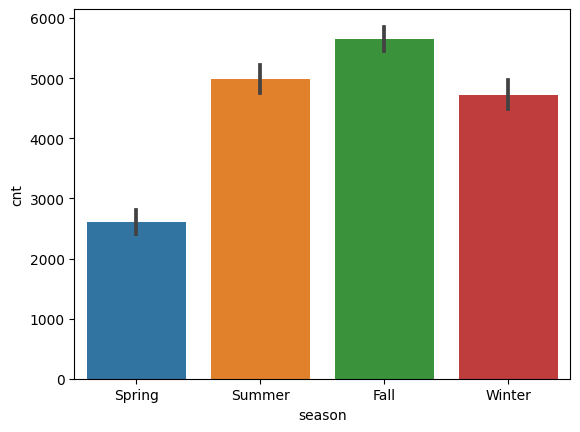

In [10]:
sns.barplot(x='season', y='cnt', data=bicycle)
plt.show()


2.WHAT IS THE TOTAL NUMBER OF BIKE RENTALS BY SEASON FOR THE YEAR 2018?

season
Fall      419650
Spring    150000
Summer    347316
Winter    326137
Name: cnt, dtype: int64


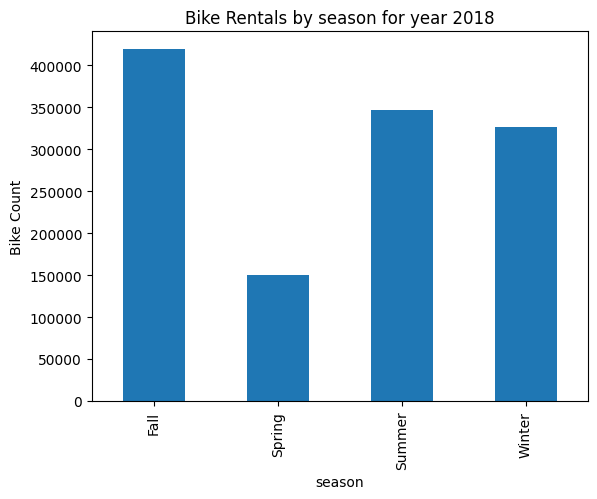

In [11]:
year_2018_bikes = bicycle[bicycle['yr'] == 2018]
year_2018_by_month = year_2018_bikes.groupby(['season'])['cnt'].sum()
print(year_2018_by_month)
year_2018_by_month.plot(kind='bar')
plt.xlabel('season')
plt.ylabel('Bike Count')
plt.title('Bike Rentals by season for year 2018')
plt.show()

3.WHAT IS THE TOTAL NUMBER OF BIKE RENTALS BY SEASON FOR THE YEAR 2019?

season
Fall      641479
Spring    319514
Summer    571273
Winter    515476
Name: cnt, dtype: int64


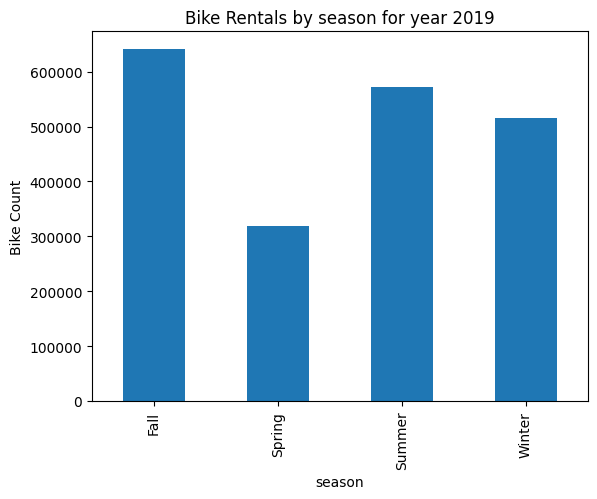

In [12]:
year_2019_bikes = bicycle[bicycle['yr'] == 2019]
year_2019_by_month = year_2019_bikes.groupby(['season'])['cnt'].sum()
print(year_2019_by_month)
year_2019_by_month.plot(kind='bar')
plt.xlabel('season')
plt.ylabel('Bike Count')
plt.title('Bike Rentals by season for year 2019')
plt.show()

4.WHAT IS THE TOTAL NUMBER OF BIKE RENTALS FOR 2018 AND 2018?

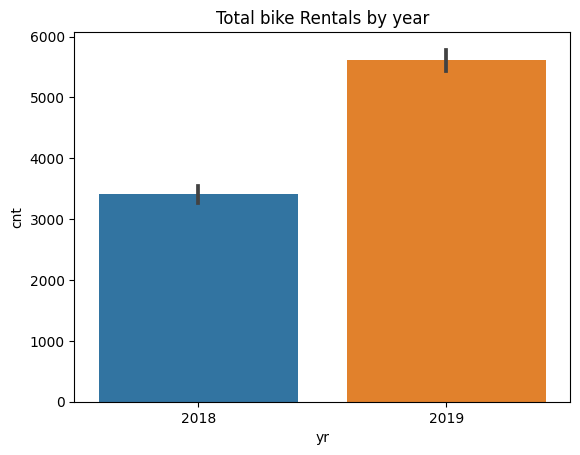

In [13]:
sns.barplot(x='yr', y='cnt', data=bicycle)
plt.title('Total bike Rentals by year')
plt.show()

5.ARE BIKE RENTALS HIGH ON WORKINGDAYS ?

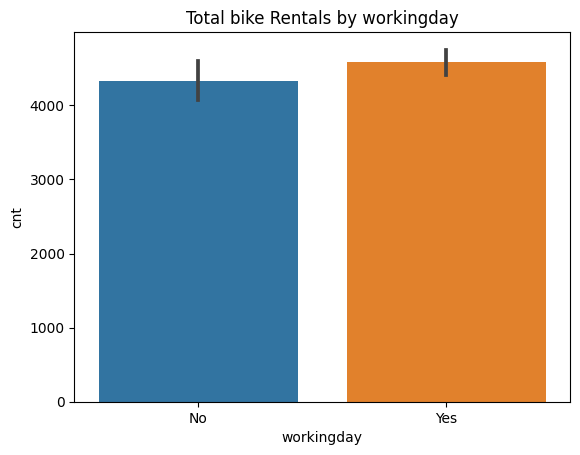

In [14]:
sns.barplot(x='workingday', y='cnt', data=bicycle)
plt.title('Total bike Rentals by workingday')
plt.show()

6.WHICH DAY IS POPULAR?

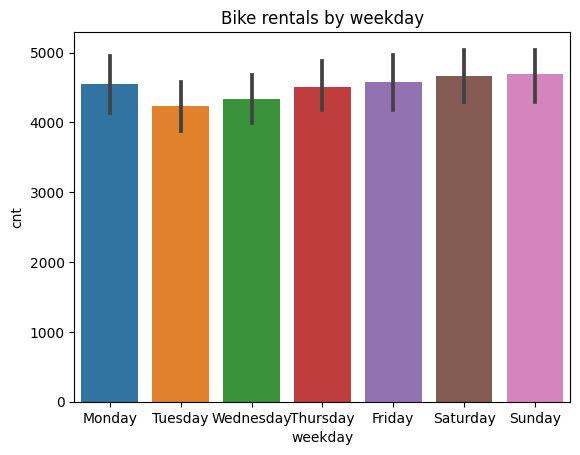

In [15]:
sns.barplot(x='weekday', y='cnt', data=bicycle)
plt.title('Bike rentals by weekday')
plt.show()

7.WHICH MONTH IS POPULAR?

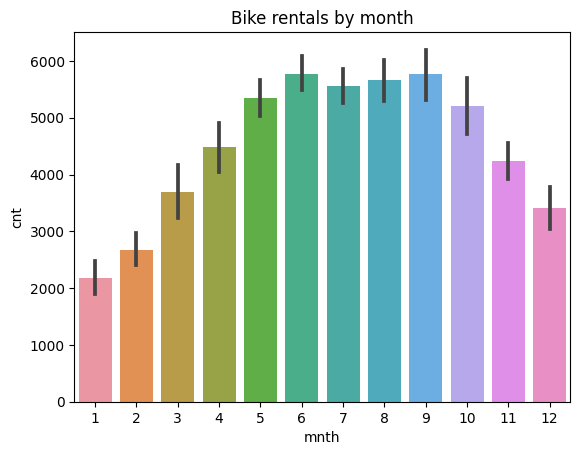

In [16]:
sns.barplot(x='mnth', y='cnt', data=bicycle)
plt.title('Bike rentals by month')
plt.show()

8.DO PEOPLE PREFER TO RENT BIKES ON HOLIDAYS ?

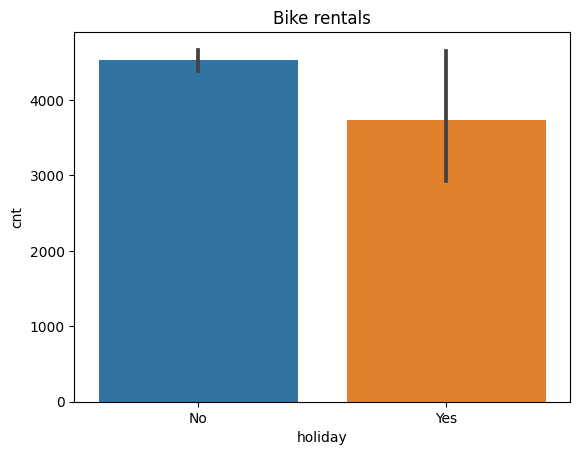

In [17]:
sns.barplot(x='holiday', y='cnt', data=bicycle)
plt.title('Bike rentals')
plt.show()

9.WHICH WEATHER SITUATION HAS A HIGH  BIKE RENTAL?

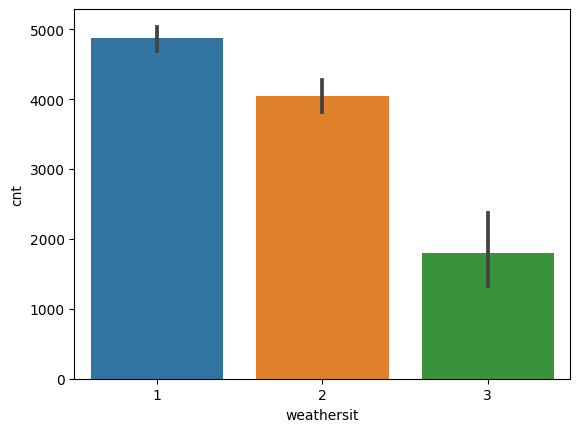

In [18]:
sns.barplot(x='weathersit', y='cnt', data=bicycle)
plt.show()

10.HOW IS THE DEMAND DISTRIBUTED?

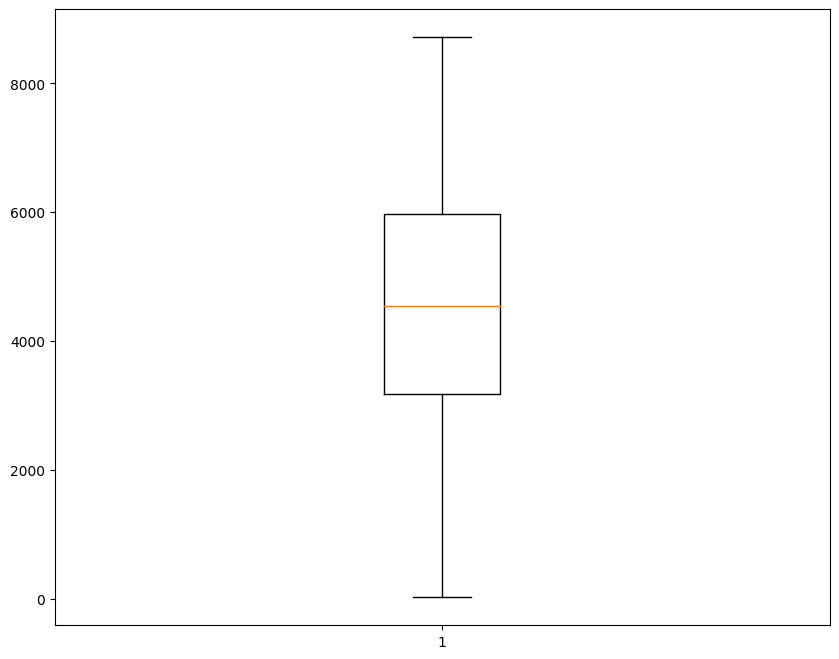

In [19]:
plt.figure(figsize=(10, 8))
plt.boxplot(bicycle['cnt'])
plt.show()


11.WHAT IS THE DEMAND  DISTRIBUTED FOR THE 2018 AND 2019?

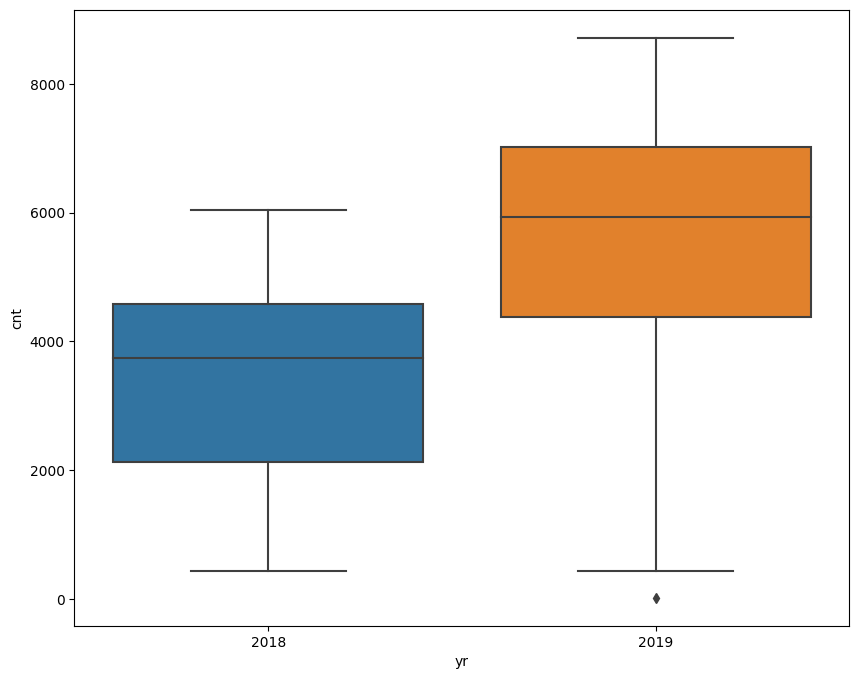

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='yr', y='cnt', data=bicycle)
plt.show()


12.WHAT IS THE DEMAND  DISTRIBUTED FOR THE MONTHS?

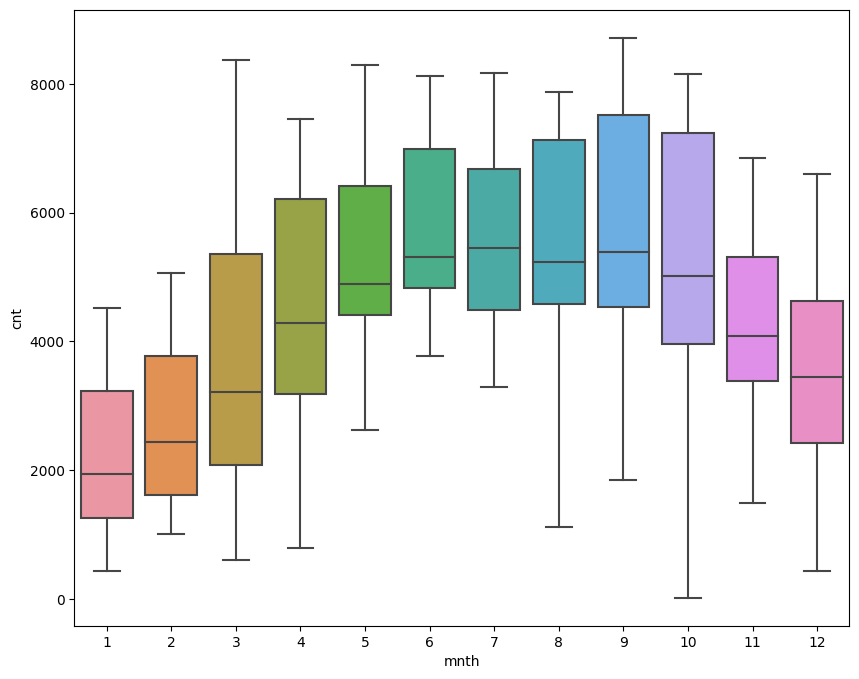

In [21]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='mnth', y='cnt', data=bicycle)
plt.show()


13.WHAT IS THE DEMAND DISTRIBUTED FOR THE SEASONS?

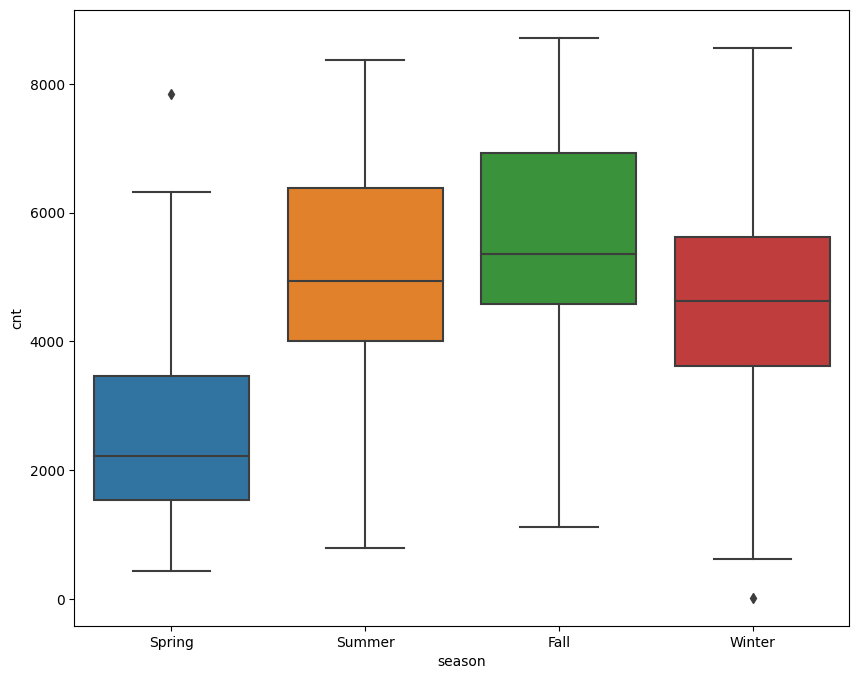

In [22]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='season', y='cnt', data=bicycle)
plt.show()


14.How does the relationship between temperature and bike rentals vary by season?

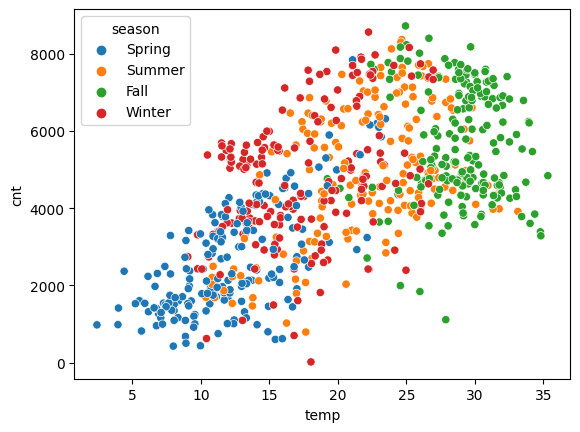

In [23]:
sns.scatterplot(x='temp', y='cnt', hue='season', data=bicycle)
plt.show()


15.Is there a relationship between windspeed and bike rentals?

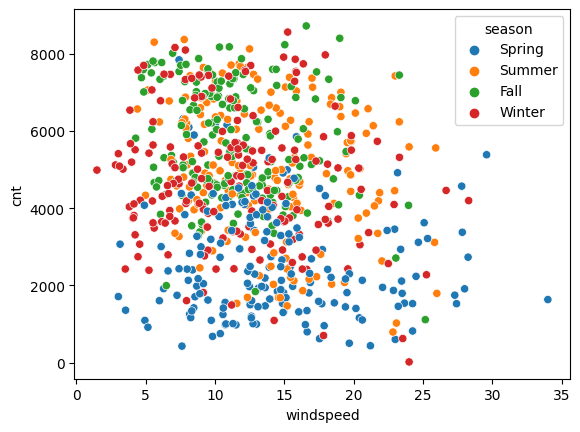

In [24]:
sns.scatterplot(x='windspeed', y='cnt', hue='season', data=bicycle)
plt.show()


16.Are there any specific seasons in which bike rentals are higher for a given humidity?

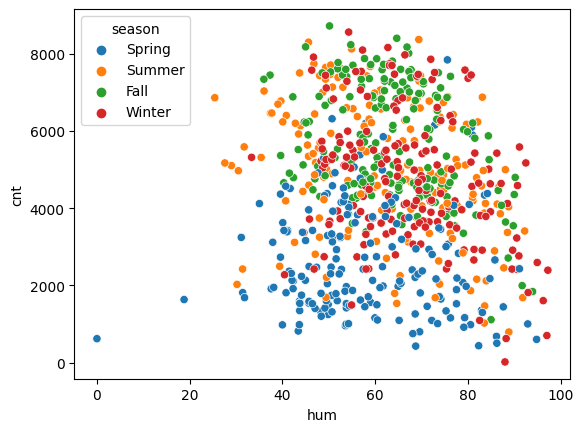

In [25]:
sns.scatterplot(x='hum', y='cnt', hue='season', data=bicycle)
plt.show()


17.Is there a relationship between  atemp  and bike rentals?

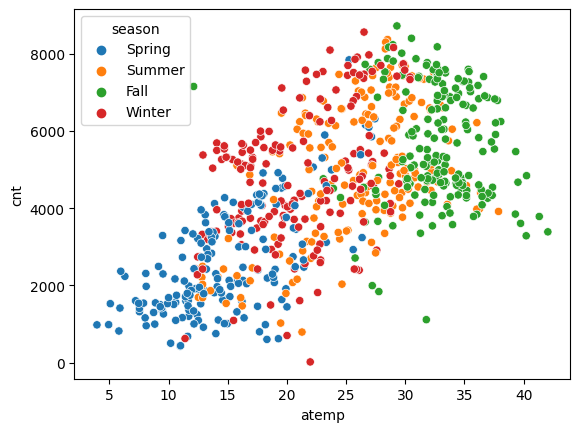

In [26]:
sns.scatterplot(x='atemp', y='cnt', hue='season', data=bicycle)
plt.show()


18.SUM OF CASUAL USERS IN 2018 AND 2019 PER MONTH

In [27]:
bicycle.groupby(['yr','mnth']).sum()['casual']

/var/folders/l_/lp5h3pmn2fs0lh819_gfmp_00000gn/T/ipykernel_6490/125207543.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bicycle.groupby(['yr','mnth']).sum()['casual']


yr    mnth
2018  1        3073
      2        6242
      3       12826
      4       22346
      5       31050
      6       30612
      7       36452
      8       28842
      9       26545
      10      25222
      11      15594
      12       8448
2019  1        8969
      2        8656
      3       31618
      4       38456
      5       44235
      6       43294
      7       41705
      8       43197
      9       43778
      10      34538
      11      21009
      12      13245
Name: casual, dtype: int64

In [28]:
bicycle.groupby(['yr','mnth']).sum()['registered']

/var/folders/l_/lp5h3pmn2fs0lh819_gfmp_00000gn/T/ipykernel_6490/765599353.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bicycle.groupby(['yr','mnth']).sum()['registered']


yr    mnth
2018  1        35116
      2        41973
      3        51219
      4        72524
      5       104771
      6       112900
      7       104889
      8       107849
      9       100873
      10       98289
      11       86573
      12       78875
2019  1        87775
      2        92647
      3       133257
      4       135768
      5       151630
      6       159536
      7       161902
      8       171306
      9       174795
      10      164303
      11      131655
      12      110468
Name: registered, dtype: int64

19.AVERAGE CASUAL WINDSPEED IN 2018 AND 2019 PER MONTH

In [29]:
bicycle.groupby(['yr','mnth']).mean()['windspeed']

/var/folders/l_/lp5h3pmn2fs0lh819_gfmp_00000gn/T/ipykernel_6490/1521948396.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bicycle.groupby(['yr','mnth']).mean()['windspeed']


yr    mnth
2018  1       13.093060
      2       15.314059
      3       15.571321
      4       16.362499
      5       12.145379
      6       11.939090
      7       11.501716
      8       12.778276
      9       10.250290
      10      11.770932
      11      12.123370
      12      11.258681
2019  1       14.551511
      2       13.675088
      3       14.270404
      4       15.058121
      5       12.375138
      6       12.907177
      7       10.750167
      8       10.392756
      9       11.986356
      10      11.706602
      11      12.506020
      12      12.406915
Name: windspeed, dtype: float64